In [1]:
from datetime import datetime as dt
from preprocessing import Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay

# Preprocessing

In [2]:
col_drop = ['CustomerId','Surname']
types = {
    'HasCrCard':bool,
    'IsActiveMember':bool
}
train = pd.read_csv('data/train.csv', index_col='id', dtype=types).drop(columns=col_drop)
test = pd.read_csv('data/test.csv', index_col='id', dtype=types).drop(columns=col_drop)

In [3]:
train.shape

(165034, 11)

In [4]:
X = train.drop(columns='Exited')
y = train.Exited

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.15)

In [6]:
prepro = Preprocessing()

In [7]:
X_train_scld = prepro.fit_transform(X_train)
X_test_scld = prepro.transform(X_test)

In [8]:
X_train_balanced, y_train_balanced = resample(X_train_scld[y_train == 1], y_train[y_train == 1], n_samples=np.sum(y_train == 0), replace=True, random_state=42)

In [9]:
X_train_balanced = np.concatenate((X_train_scld[y_train == 0], X_train_balanced))
y_train_balanced = np.concatenate((y_train[y_train == 0], y_train_balanced))

# Model

In [16]:
params = {
    'hidden_layer_sizes':(100,),
    'max_iter':500,
    'activation':'relu',
    'learning_rate':'adaptive',
    'learning_rate_init':0.001
    
}

nn = MLPClassifier(
    **params, random_state=42, verbose=True)

In [17]:
nn.fit(X_train_scld, y_train)

Iteration 1, loss = 0.37908698
Iteration 2, loss = 0.32983927
Iteration 3, loss = 0.32567953
Iteration 4, loss = 0.32409784
Iteration 5, loss = 0.32358679
Iteration 6, loss = 0.32322258
Iteration 7, loss = 0.32304403
Iteration 8, loss = 0.32284498
Iteration 9, loss = 0.32262705
Iteration 10, loss = 0.32247457
Iteration 11, loss = 0.32242143
Iteration 12, loss = 0.32213801
Iteration 13, loss = 0.32209339
Iteration 14, loss = 0.32203588
Iteration 15, loss = 0.32198848
Iteration 16, loss = 0.32179205
Iteration 17, loss = 0.32162537
Iteration 18, loss = 0.32144768
Iteration 19, loss = 0.32123620
Iteration 20, loss = 0.32118284
Iteration 21, loss = 0.32118000
Iteration 22, loss = 0.32088937
Iteration 23, loss = 0.32079868
Iteration 24, loss = 0.32069034
Iteration 25, loss = 0.32063908
Iteration 26, loss = 0.32053889
Iteration 27, loss = 0.32033364
Iteration 28, loss = 0.32020939
Iteration 29, loss = 0.32004565
Iteration 30, loss = 0.31989052
Iteration 31, loss = 0.31989210
Iteration 32, los

MLPClassifier(learning_rate='adaptive', max_iter=500, random_state=42,
              verbose=True)

# Score

In [21]:
pred = nn.predict(X_test_scld)
pred_proba = nn.predict_proba(X_test_scld)[:,1]

In [22]:
RocScore  = roc_auc_score(y_test, pred_proba)
print(f'Roc Auc Score : {RocScore:.6f}')

Roc Auc Score : 0.887975


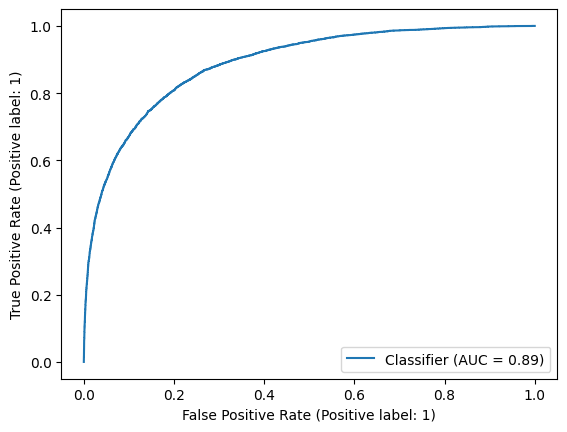

In [23]:
RocCurveDisplay.from_predictions(y_test,pred_proba)

# Submission

In [ ]:
X_val_scld = prepro.transform(test)

In [ ]:
submission = pd.read_csv("data/sample_submission.csv", index_col='id')

In [ ]:
submission.loc[:,'Exited'] = nn.predict_proba(X_val_scld)[:,1]

/Users/marc/Library/Mobile Documents/com~apple~CloudDocs/Projects/Playground/playgroundseries_s4e1/.venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission

,Exited
id,
165034,0.080412
165035,0.951204
165036,0.096977
165037,0.529652
165038,0.639720
...,...
275052,0.134360
275053,0.228869
275054,0.064918


In [ ]:
name = dt.now().strftime("%Y%m%d_%H%M")

In [ ]:
#submission.to_csv(f"submission/{name}.csv")